In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# Suppressing warning messages
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the data set
import pandas as pd
import numpy as np
NetflixData = pd.read_csv("/content/drive/MyDrive/NFLX.csv", encoding="latin")
print("Shape before deleting duplicate values: ", NetflixData.shape)

# Removing duplicate rows if any
NetflixData = NetflixData.drop_duplicates()
print("Shape after deleting duplicate values: ", NetflixData.shape)

# Printing sample data
# Start observing the variables
NetflixData.head(10)

Shape before deleting duplicate values:  (1009, 7)
Shape after deleting duplicate values:  (1009, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


Observations so far:
The file contains 1009 details with 14 attributes

Problem Statement Definition:
Creating a prediction model to predict future stocks for Netflix
Target Variable: Close

Choosing appropriate ML/AI Algorithm for Data Analysis:
Based on the problem statement we need to create a supervise ML Regression model, as the target variable is Continuous.

The goal is for our data to have a bell curve or a slightly skewed version of it. We will create a histogram to best see this.

<Axes: >

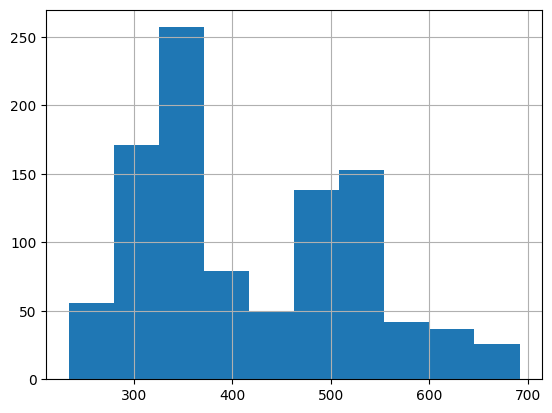

In [ ]:
%matplotlib inline
# Creating a histogram as the Target variable is Continuous
# This will help us to understand the distribution of the "Close" values
NetflixData["Close"].hist()

Observations: The data distribution of the target variable is satisfactory to proceed. There are sufficiant number of rows for each type of values to learn from.

The next step is to conduct an initial assessment of the data to identify which columns are quantitative, categorical or qualitative. If a column does not affect the "Close" column, it will be removed from the data.

In [ ]:
# Looking at sample rows in the data
NetflixData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
# Looking at more samples
NetflixData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
# Observing the summarized information of data
NetflixData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
# Looking at the descriptive statistics of the data
NetflixData.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06


In [ ]:
# Finding unique values for each column
# If the number of uniqu values are < 20 it will be considered category,
# otherwise continuous
NetflixData.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

Based on our findings, all columns except for "Date" will be considered as continuous, so "Date" will be deleted and the remaining data can be used for ML.

In [ ]:
# Deleting "Date" column
NetflixData = NetflixData.drop(columns="Date")

The next step will be to create histograms of all columns.

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

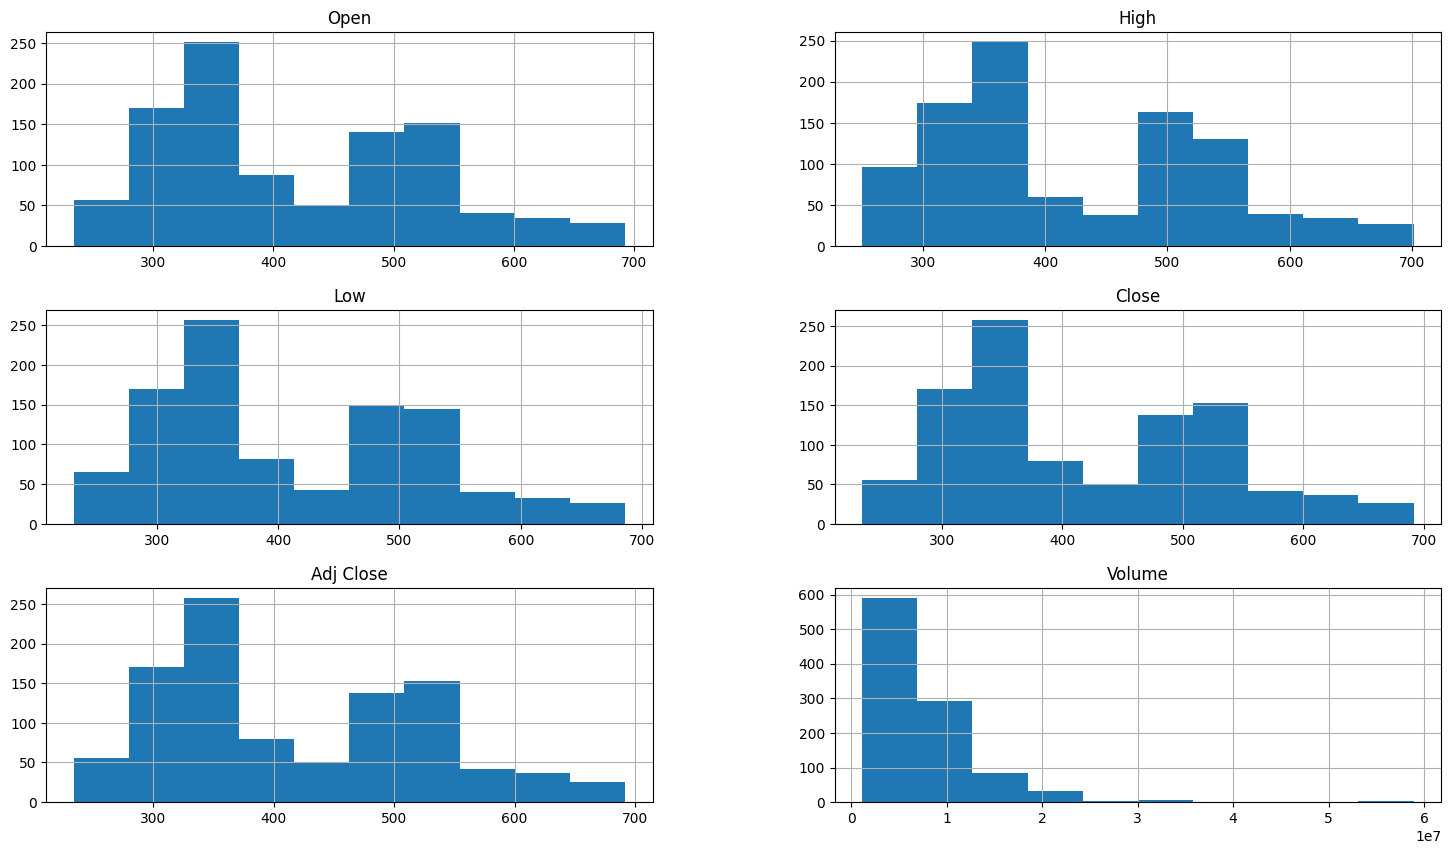

In [ ]:
# Plotting histograms of multiple columns together
NetflixData.hist(["Open", "High", "Low", "Close", "Adj Close", "Volume"], figsize=(18,10))

All histograms that are selected have good distribution.

No outlier removal is required for this data set

Missing values will now be checked. If any of the columns have more than 30% of values missing then the column will be rejected.

In [ ]:
# Finding how many missing values there are for each column
NetflixData.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no data missing from any columns, thereforethere is no need to do any removal.

Now I will choose the best columns (Features) which are correlated to the target variable (Close). First I will visually inspect the data. Since all of the data is continuous scatter plots will be used.

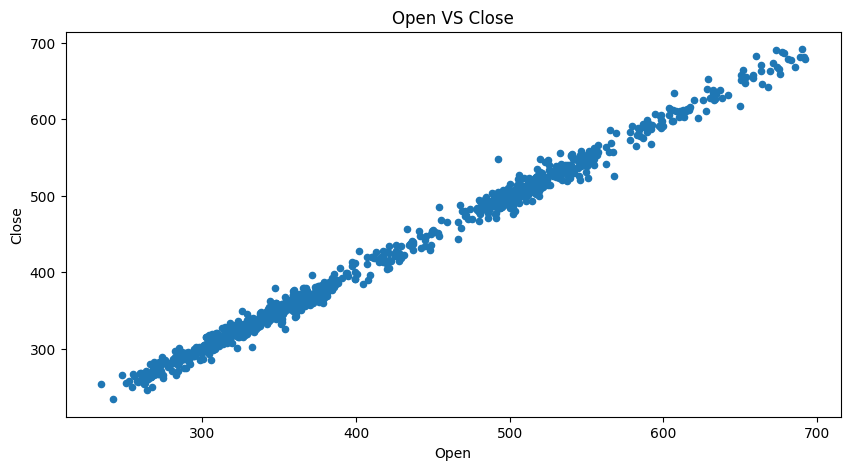

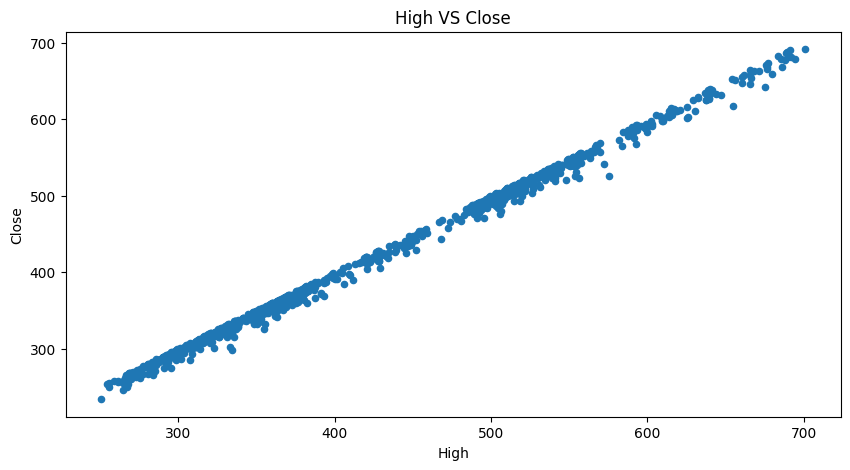

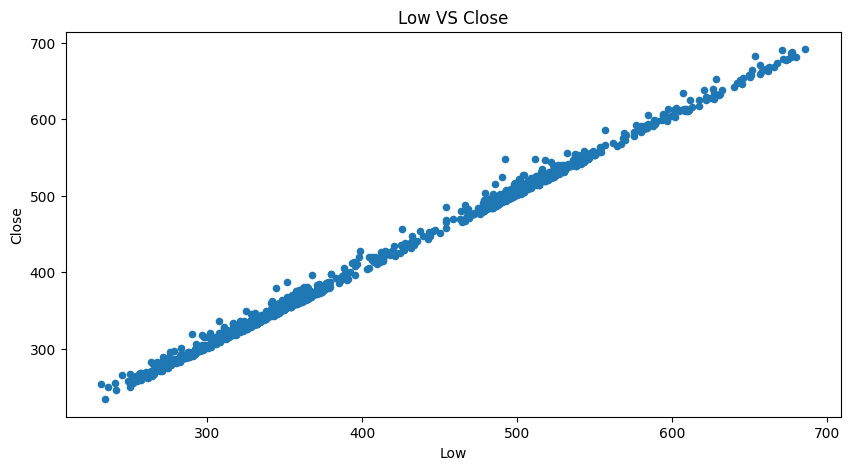

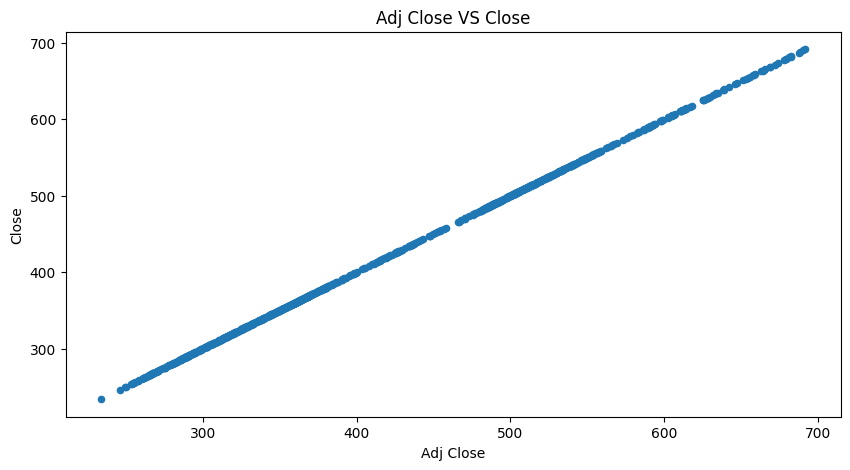

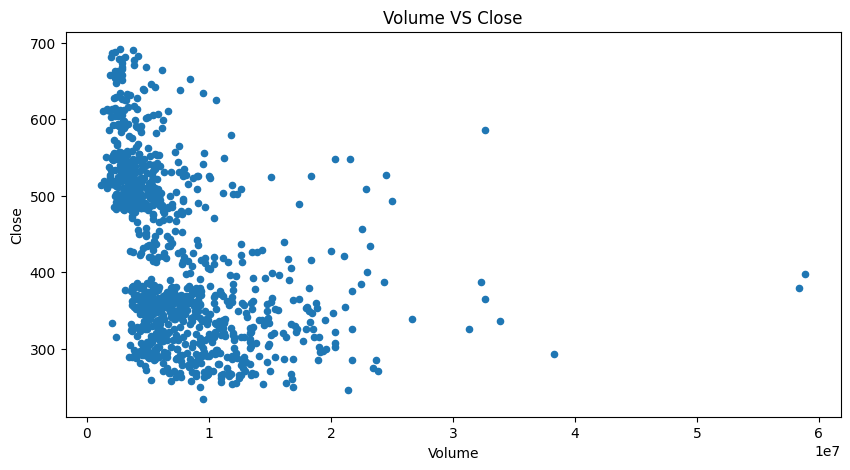

In [ ]:
ContinousCols = ["Open", "High", "Low",
                 "Adj Close", "Volume"]
# Plotting scatter chart for each predictor vs the target variable "Close"
for predictor in ContinousCols:
  NetflixData.plot.scatter(x=predictor, y="Close", figsize=(10,5), title=predictor+" VS "+ "Close")


Although there are a few trends seen that would be good for ML, the correlation values for each column against the target variable will be calculated to achive the best results.

In [ ]:
# Calculating correlation matrix
ContinuousCols = ["Open", "High", "Low",
                 "Close", "Adj Close", "Volume"]

# Creating the correlation matrix
CorrelationData = NetflixData[ContinuousCols].corr()

In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with target variable
CorrelationData["Close"][abs(CorrelationData["Close"]) > 0.5]

Open         0.996812
High         0.998551
Low          0.998544
Close        1.000000
Adj Close    1.000000
Name: Close, dtype: float64

Observations from these calculations show that the continous columns we will select are "Open", "High" and "Low". "Adj Close" will not be used as it is too similar to our target variable "Close".

As the target variable is continous and the predictor is categorical, I will analyze using boxplots.

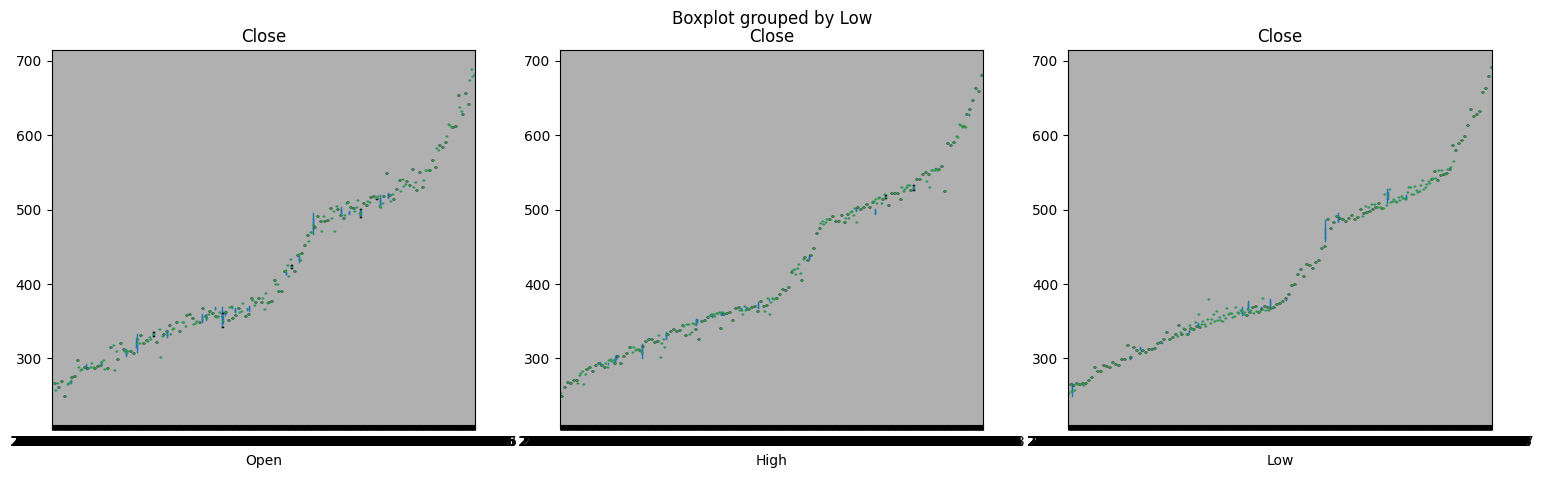

In [ ]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=["Open", "High", "Low"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    NetflixData.boxplot(column="Close", by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  import scipy

  # Creating an empty list of final selected predictors
  SelectedPredictors = []

  print("##### ANOVA Results ##### \n")
  for predictor in CategoricalPredictorList:
    CategoryGroupLists = inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = scipy.stats.f_oneway(*CategoryGroupLists)

    # If the ANOVA p-value is <0.05, that means we reject
    if (AnovaResults[1] < 0.05):
      print(predictor, "is correlated with", TargetVariable, "| P-Value: ", AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
# Calling the function
CategoricalPredictorList = ["Open", "High", "Low"]
FunctionAnova(inpData=NetflixData,
              TargetVariable="Close",
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Open is correlated with Close | P-Value:  7.2308149687975e-34


['Open']

The analysis confirms our visual analysis of the boxplots above. Based on extensive tests, we can select the final predictors for ML model as:
"Open", "High", "Low"

In [ ]:
SelectedColumns = ["Open", "High", "Low"]

# Selecting final columns
DataForML = NetflixData[SelectedColumns]
DataForML.head()

,Open,High,Low
0,262.000000,267.899994,250.029999
1,247.699997,266.700012,245.000000
2,266.579987,272.450012,264.329987
3,267.079987,267.619995,250.000000
4,253.850006,255.800003,236.110001


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle("DataForML.pkl")

Steps for Pre-processing for ML model building or model develpment:


1.   Converting each ordinal categorical columns to numeric
2.   Converting binary nominal categorical columns to numeric using 1/0 mapping
3.   Converting all other nominal categorical columns to numeric using pd.get_dummies()
4.   Data Transformation (Optional)



In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding target variable to the data
DataForML_Numeric["Close"]=NetflixData["Close"]

# Printing sample rows
DataForML_Numeric.head()

,Open,High,Low,Close
0,262.000000,267.899994,250.029999,254.259995
1,247.699997,266.700012,245.000000,265.720001
2,266.579987,272.450012,264.329987,264.559998
3,267.079987,267.619995,250.000000,250.100006
4,253.850006,255.800003,236.110001,249.470001


In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Separating target and predictor variables
TargetVariable = "Close"
Predictors = ["Open", "High", "Low"]

x = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Spliting the data into 2 sets, one for training and one for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=428)

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose between standardization or normalization
# For our chosen dataset, MinMax produced better results

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(x)

# Generating the standardized values of x
x = PredictorScalerFit.transform(x)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(x_train.shape)
print(y_test.shape)
print(x_train.shape)
print(y_test.shape)

(706, 3)
(303,)
(706, 3)
(303,)


In [ ]:
##### Multiple Linear Regression #####
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(x_train,y_train)
prediction=LREG.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(x_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9986731542285744

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           508.0
1  0.592304  0.572101  0.561601  494.730011           493.0
2  0.596449  0.585891  0.589962  500.859985           507.0
3  0.330279  0.303482  0.322451  380.070007           381.0
4  0.195188  0.166985  0.182474  315.100006           319.0
Mean Accuracy on test data: 99.3029073385015
Median Accuracy on test data: 99.47124720149543

Accuracy values for 10-fold Cross Validation:
 [99.21860151 99.21910542 99.19755296 99.4083654  99.47040237 98.9092798
 99.20776329 99.40785386 99.62149833 99.22984505]

Final Average Accuracy of the model: 99.29


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9976613969339876

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           509.0
1  0.592304  0.572101  0.561601  494.730011           496.0
2  0.596449  0.585891  0.589962  500.859985           509.0
3  0.330279  0.303482  0.322451  380.070007           386.0
4  0.195188  0.166985  0.182474  315.100006           322.0
Mean Accuracy on test data: 98.56869716791199
Median Accuracy on test data: 98.8354057430968

Accuracy values for 10-fold Cross Validation:
 [98.40322063 98.50561057 98.48597259 98.84648187 98.33407053 97.24234762
 97.95457369 98.81150986 98.98729668 95.64877392]

Final Average Accuracy of the model: 98.12


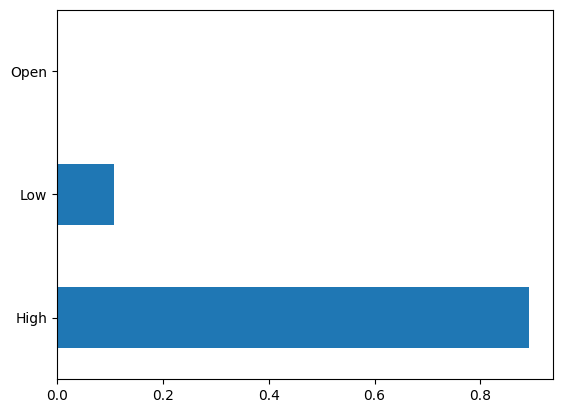

In [ ]:
##### Decision Trees (Multiple if-else statements!) #####
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(x_train,y_train)
prediction=DT.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

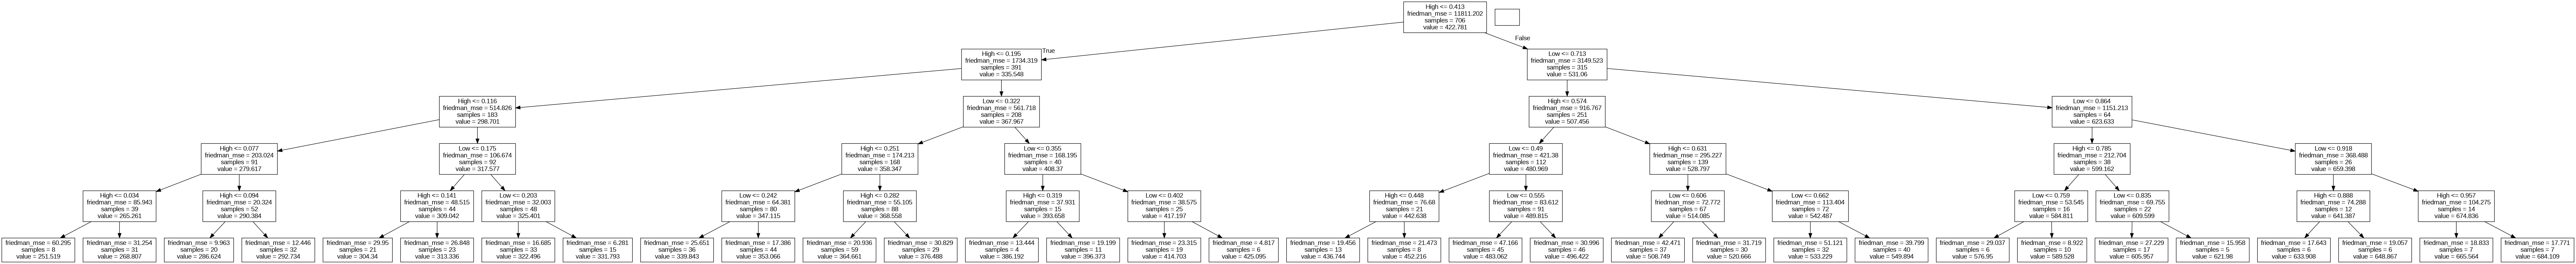

In [ ]:
##### Load libraries #####
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=250)
# Double click on the graph to zoom in

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.997098915808431

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           500.0
1  0.592304  0.572101  0.561601  494.730011           497.0
2  0.596449  0.585891  0.589962  500.859985           502.0
3  0.330279  0.303482  0.322451  380.070007           383.0
4  0.195188  0.166985  0.182474  315.100006           322.0
Mean Accuracy on test data: 98.70881305249408
Median Accuracy on test data: 99.00620041834864

Accuracy values for 10-fold Cross Validation:
 [98.43149801 98.40228686 98.3975437  98.83578751 98.63295034 97.36499215
 97.78704002 98.57796406 98.98764119 94.58991709]

Final Average Accuracy of the model: 98.0


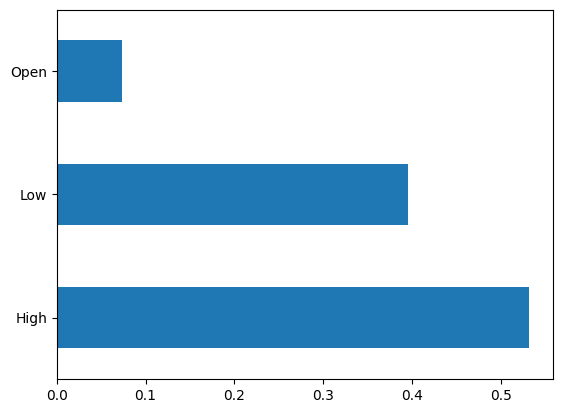

In [ ]:
##### Random Forest (Bagging of multiple Decision Trees) #####
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(x_train,y_train)
prediction=RF.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

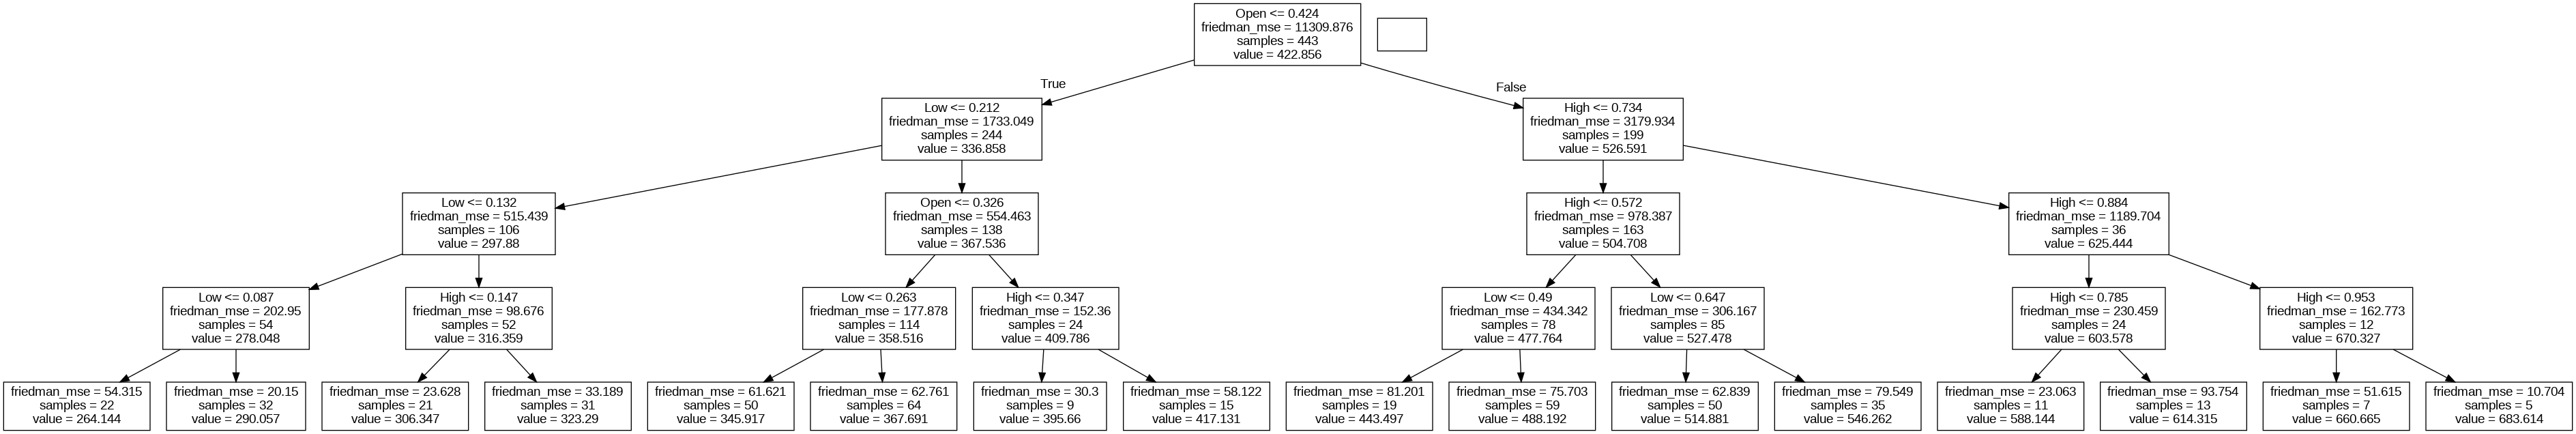

In [ ]:
##### Plotting a single Decision Tree from Random Forest #####
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=400)
# Double click on the graph to zoom in

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9889664819653937

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           495.0
1  0.592304  0.572101  0.561601  494.730011           492.0
2  0.596449  0.585891  0.589962  500.859985           506.0
3  0.330279  0.303482  0.322451  380.070007           392.0
4  0.195188  0.166985  0.182474  315.100006           317.0
Mean Accuracy on test data: 97.66559785703531
Median Accuracy on test data: 97.99757103159762

Accuracy values for 10-fold Cross Validation:
 [97.19968345 97.21064063 96.69714082 97.20825043 96.95498707 94.65047818
 98.43453659 97.10510131 97.92045449 93.68878392]

Final Average Accuracy of the model: 96.71


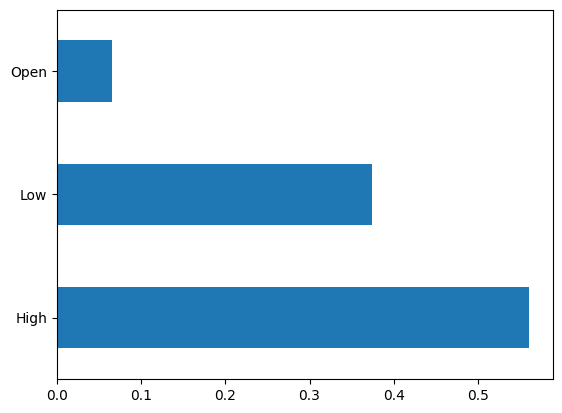

In [ ]:
##### Adaboost (Boosting of multiple Decision Trees) #####
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9995434001336165

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           508.0
1  0.592304  0.572101  0.561601  494.7

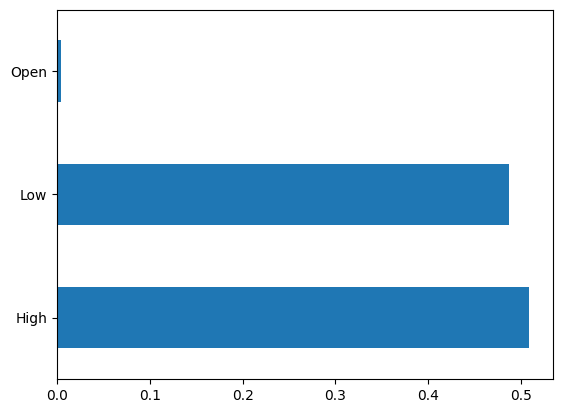

In [ ]:
##### Xtreme Gradient Boosting (XGBoost) #####
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(x_train,y_train)
prediction=XGB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

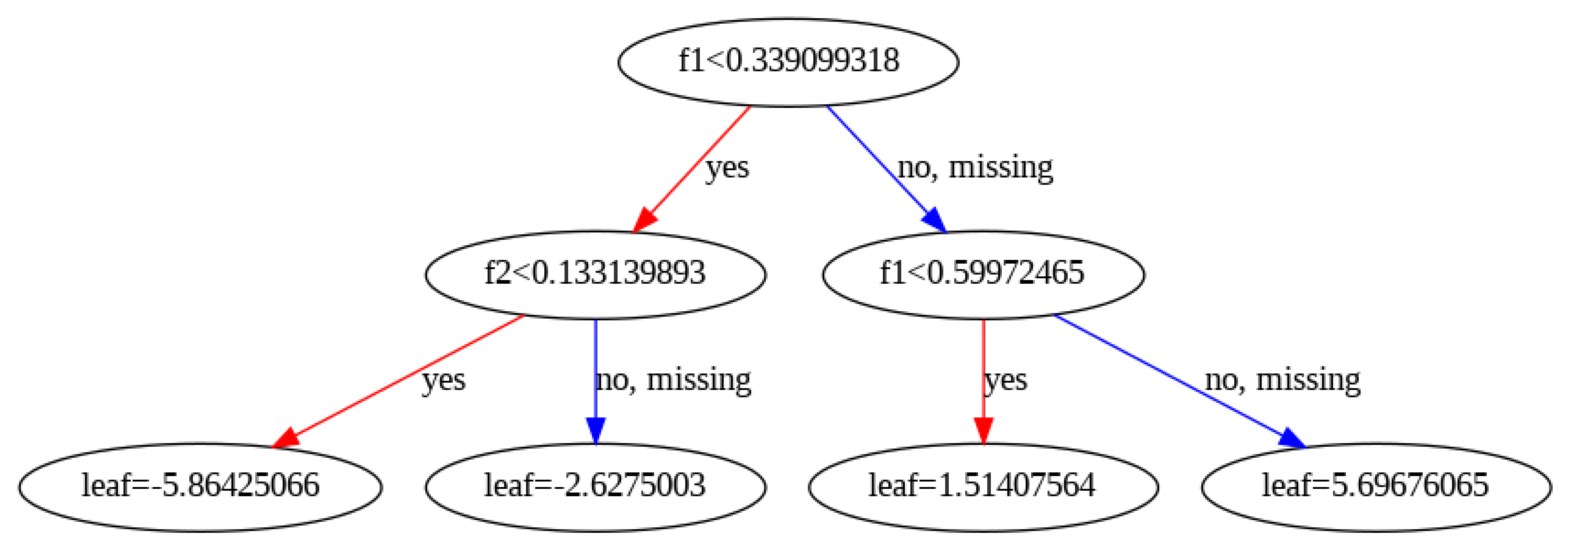

In [ ]:
 ##### Plotting a single Decision tree out of XGBoost #####
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

In [ ]:
##### K-Nearest Neighbor(KNN) #####
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9989790942951331

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           505.0
1  0.592304  0.572101  0.561601  494.730011           488.0
2  0.596449  0.585891  0.589962  500.859985           507.0
3  0.330279  0.303482  0.322451  380.070007           382.0
4  0.195188  0.166985  0.182474  315.100006           321.0
Mean Accuracy on test data: 99.05814068358532
Median Accuracy on test data: 99.31442221288626

Accuracy values for 10-fold Cross Validation:
 [98.95644363 99.0577121  98.9613391  99.27343742 99.14276876 98.36592285
 98.83590812 99.26087998 99.45536694 95.95525821]

Final Average Accuracy of the model: 98.73


In [ ]:
##### Support Vector Machines(SVM) #####
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(x_train,y_train)
prediction=SVM.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9848756652044762

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           491.0
1  0.592304  0.572101  0.561601  494.730011           489.0
2  0.596449  0.585891  0.589962  500.859985           495.0
3  0.330279  0.303482  0.322451  380.070007           385.0
4  0.195188  0.166985  0.182474  315.100006           330.0
Mean Accuracy on test data: 97.37754351648478
Median Accuracy on test data: 97.57053406234954

Accuracy values for 10-fold Cross Validation:
 [97.88638675 98.16071876 98.13584888 98.36011165 97.40298007 98.57742851
 98.33862382 97.764735   97.7962814  96.47717868]

Final Average Accuracy of the model: 97.89


Based on the above trials we now determine which algorithm to use based off the final average accuracy of the model. Here are the results:


1.   Linear Regression: 99.29
2.   Decision Tree Regressor: 98.12
3.   Random Forrest Regressor: 98.01
4.   Adaboost Regressor: 96.74
5.   XGB Regressor: 98.64
6.   K-Nearest Neighbour: 98.73
7.   Support Vector Machine: 97.89

All algorithms produced a final average accuracy of over 96. The model with the highest accuracy was Linear Regression so that is what I am choosing. In order to deploy the model we must do the following steps:


1.   Train/Build the model again using 100% data available
2.   Save the model as a serialized file which can be stored anywhere
3.   Create a function which gets integrated with from-end viewer to take all the inputs and returns the prediction

As there are only 3 predictors ("Open", "High", "Low") we will use all of these.





In [ ]:
# Separating target and predictor variables
TargetVariable = "Close"
Predictors = ["Open", "High", "Low"]

x = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose between standardization or normalization
# For this data MinMax produced better results

PredictorScaler=MinMaxScaler()

# Storing te fit object for later reference
PredictorScalerFit = PredictorScaler.fit(x)

# Generating the standardized values of x
x = PredictorScalerFit.transform(x)

print(x.shape)
print(y.shape)

(1009, 3)
(1009,)


In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [99.21860151 99.21910542 99.19755296 99.4083654  99.47040237 98.9092798
 99.20776329 99.40785386 99.62149833 99.22984505]

Final Average Accuracy of the model: 99.29


In [ ]:
# Training the model on 100% Data available
Final_Linear_Model = RegModel.fit(x,y)

In [47]:
import pickle
import os

# Saving the python objects as serialized files can be done using pickle library
# Here let us save the final model
with open("Final_Linear_Model.pkl", "wb") as fileWriteStream:
  pickle.dump(Final_Linear_Model, fileWriteStream)
  # Don't forget to close the filestream
  fileWriteStream.close()

print("pickle file of predictive model is save at location:", os.getcwd())

pickle file of predictive model is save at location: /content/drive/MyDrive


In [48]:
# Creating a python function
from re import IGNORECASE
# This function can be called from any front end tool/website

def FunctionPredictResult(InputData):
  import pandas as pd
  Num_Inputs = InputData.shape[0]

  # Making sure the input data has same columns as it was used for training the model
  # Also, if standardization/normalization was done, then same must be done for new input

  # Appending the new data with the Training data
  DataForML=pd.read_pickle('DataForML.pkl')
  #InputData=InputData.append(DataForML, ignore_index=True)
  InputData = pd.concat([InputData, DataForML], ignore_index=True)

  # Generating dummy variables for rest of the nominal variables
  InputData=pd.get_dummies(InputData)

  # Maintaining the same order of columns as it was during the model training
  Predictors = ["Open", "High", "Low"]

  # Generating the input values to the model
  x=InputData[Predictors].values[0:Num_Inputs]

  # Generating the standardized values of X since it was done while model training also
  x=PredictorScalerFit.transform(x)

  # Loading the Function from pickle file
  import pickle
  with open("Final_Linear_Model.pkl", "rb") as fileReadStream:
    PredictionModel = pickle.load(fileReadStream)
    # Don't forget to close the filestream
    fileReadStream.close()

  # Generating Predictions
  Prediction = PredictionModel.predict(x)
  PredictionResult = pd.DataFrame(Prediction, columns = ["Predictions"])
  return(PredictionResult)


In [49]:
# Calling the function for some new data
NewSampleData = pd.DataFrame(data=[[4.98, 6.575, 15.3], [4.98, 3.2, 10.3]], columns=["Open", "High", "Low"])
print(NewSampleData)

# Calling the function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Open   High   Low
0  4.98  6.575  15.3
1  4.98  3.200  10.3


,Predictions
0,15.125432
1,8.455657


from matplotlib import pyplot as plt
_df_0['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

In [45]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split

class NetflixStockPredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Netflix Stock Prediction App')
        self.data = pd.read_csv('NFLX.csv')
        self.sliders = []

        self.X = self.data.drop('Close', axis=1).values
        self.y = self.data['Close'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted stock close price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = HousePricePredictionApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable